In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap
import seaborn as sns

from sklearn.preprocessing import (MinMaxScaler, StandardScaler)

import os

In [2]:
FILE = "wt_YCC_3lv_db5"

In [3]:
PATH_DUMP = "./object dump/rose"
assert os.path.exists(PATH_DUMP)

train_set = np.load(os.path.join(PATH_DUMP, FILE+".npy"))
train_label = np.load(os.path.join(PATH_DUMP, FILE+"_label.npy"))
train_set.shape

(5487, 60)

In [4]:
PATH_DUMP = "./object dump/no union"
assert os.path.exists(PATH_DUMP)

test_set = np.load(os.path.join(PATH_DUMP, FILE+".npy"))
test_label = np.load(os.path.join(PATH_DUMP, FILE+"_label.npy"))
test_set.shape

(2345, 60)

In [5]:
A = np.concatenate((train_set, test_set), axis=0)
b = np.concatenate((train_label, test_label))
ds = np.concatenate((np.zeros(train_label.shape[0], dtype=np.int8),
                     np.ones(test_label.shape[0], dtype=np.int8)))

In [6]:
sns_cmap = sns.color_palette()
color_mapper = {
    0 : sns_cmap[0],  # fake
    1 : sns_cmap[1],  # real
    2 : sns_cmap[2],  # f
    3 : sns_cmap[3],  # r
    4 : sns_cmap[9],  # f
    5 : sns_cmap[6],  # r
}
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [15]:
reducer = umap.UMAP(
    n_components=3,
    n_neighbors=100,
    min_dist=0.5,
    random_state=42)
scaler = StandardScaler()

In [16]:
A_s = scaler.fit_transform(A)

In [17]:
embedding = reducer.fit_transform(A_s)
embedding.shape

(7832, 3)

Text(0.5, 1.0, 'neighbors = 100')

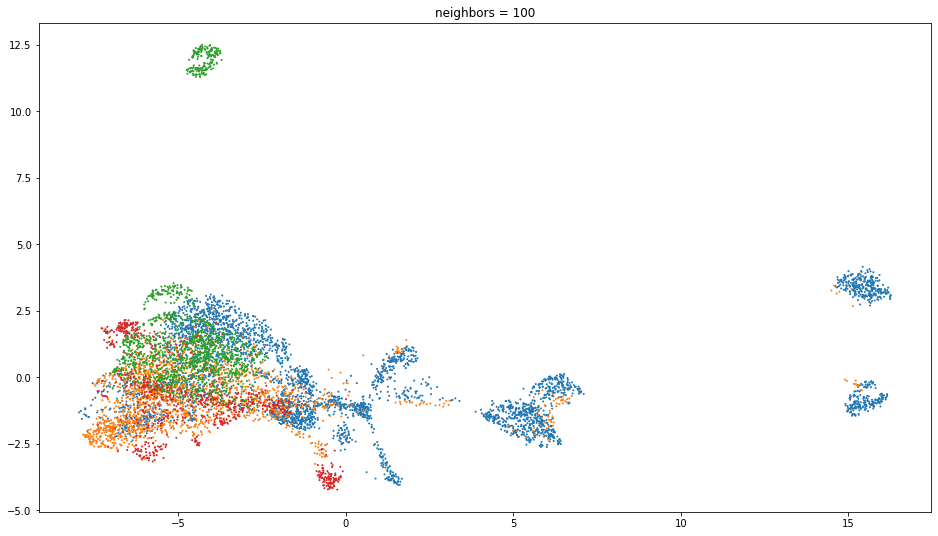

In [18]:
fig, ax = plt.subplots(figsize=(16,9))
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[color_mapper[a + 2*ds[i]] for i, a in enumerate(b)],
    s=1,)
ax.set_title('neighbors = {}'.format(reducer.n_neighbors))

Text(0.5, 0.92, 'neighbors = 100')

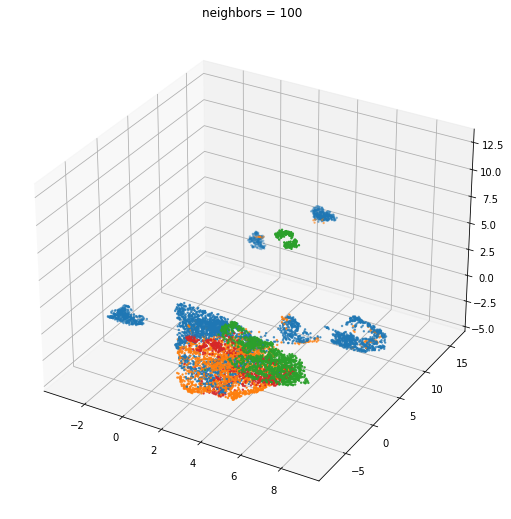

In [23]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding[:, 2],
    embedding[:, 0],
    embedding[:, 1],
    c=[color_mapper[a + 2*ds[i]] for i, a in enumerate(b)],
    s=2)
ax.set_title('neighbors = {}'.format(reducer.n_neighbors))